In [1]:
#Sentiment Analysis
import numpy as np # linear algebra
import pandas as pd 

import os
print(os.listdir("../input"))



['test.csv', 'train.csv', 'logisticRegression.pkl']


Here we begin with a dataset containing sample tweets for which we will preprocess the tweets. 

In [2]:
train = pd.read_csv("../input/train.csv", encoding="latin-1")
train.head()


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
train["word_count"]=train['SentimentText'].apply(lambda x: len(str(x).split(" ")))
train[['word_count', 'SentimentText']].head(5)

,word_count,SentimentText
0,28,is so sad for my APL frie...
1,25,I missed the New Moon trail...
2,19,omg its already 7:30 :O
3,36,.. Omgaga. Im sooo im gunna CRy. I'...
4,24,i think mi bf is cheating on me!!! ...


In [4]:
train["character_count"]=train["SentimentText"].str.len()
train[["character_count", "SentimentText"]].head(5)

,character_count,SentimentText
0,61,is so sad for my APL frie...
1,51,I missed the New Moon trail...
2,37,omg its already 7:30 :O
3,132,.. Omgaga. Im sooo im gunna CRy. I'...
4,53,i think mi bf is cheating on me!!! ...


In [5]:
def avg_word(sentence):
    words=sentence.split()
    return(sum(len(word) for word in words)/len(words))

train["word_length"]=train["SentimentText"].apply(lambda x: avg_word(x))
train[["word_length", "SentimentText"]].head()
    

,word_length,SentimentText
0,4.857143,is so sad for my APL frie...
1,4.500000,I missed the New Moon trail...
2,3.800000,omg its already 7:30 :O
3,3.880000,.. Omgaga. Im sooo im gunna CRy. I'...
4,3.333333,i think mi bf is cheating on me!!! ...


In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train["stop_words"]=train["SentimentText"].apply(lambda x: len([x for x in x.split() if x in stop]))
train[["stop_words", "SentimentText"]].head()
                                                 

,stop_words,SentimentText
0,4,is so sad for my APL frie...
1,1,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,7,.. Omgaga. Im sooo im gunna CRy. I'...
4,3,i think mi bf is cheating on me!!! ...


In [7]:
train["hashtags"]=train["SentimentText"].apply(lambda x: len([x for x in x.split() if x.startswith("#")]))
train[["hashtags", "SentimentText"]].head(10)        

,hashtags,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,0,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
6,0,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| ...
8,0,handed in my uniform today . i miss you ...
9,0,hmmmm.... i wonder how she my number @-)


In [8]:
train["numerics"]=train["SentimentText"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[["numerics", "SentimentText"]].head()

,numerics,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,0,omg its already 7:30 :O
3,1,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [9]:
train["upper"]=train["SentimentText"].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[["upper", "SentimentText"]].head()

,upper,SentimentText
0,1,is so sad for my APL frie...
1,1,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,1,.. Omgaga. Im sooo im gunna CRy. I'...
4,1,i think mi bf is cheating on me!!! ...


In [10]:
train['SentimentText'] = train['SentimentText'].apply(lambda x: (" ".join(x.lower() for x in x.split())))
train['SentimentText'].head(10)


0             is so sad for my apl friend.............
1                     i missed the new moon trailer...
2                              omg its already 7:30 :o
3    .. omgaga. im sooo im gunna cry. i've been at ...
4               i think mi bf is cheating on me!!! t_t
5                            or i just worry too much?
6                   juuuuuuuuuuuuuuuuussssst chillin!!
7             sunny again work tomorrow :-| tv tonight
8      handed in my uniform today . i miss you already
9             hmmmm.... i wonder how she my number @-)
Name: SentimentText, dtype: object

In [11]:
train["SentimentText"]=train["SentimentText"].str.replace('[^\w\s]', '')
train["SentimentText"].head(10)

0                          is so sad for my apl friend
1                        i missed the new moon trailer
2                                omg its already 730 o
3     omgaga im sooo im gunna cry ive been at this ...
4                  i think mi bf is cheating on me t_t
5                             or i just worry too much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                sunny again work tomorrow  tv tonight
8       handed in my uniform today  i miss you already
9                    hmmmm i wonder how she my number 
Name: SentimentText, dtype: object

In [12]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

train["SentimentText"]=train["SentimentText"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train["SentimentText"].head(10)

0                                       sad apl friend
1                              missed new moon trailer
2                                      omg already 730
3    omgaga im sooo im gunna cry ive dentist since ...
4                             think mi bf cheating t_t
5                                           worry much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                       sunny work tomorrow tv tonight
8                    handed uniform today miss already
9                                  hmmmm wonder number
Name: SentimentText, dtype: object

In [13]:
freq=pd.Series(' '.join(train["SentimentText"]).split()).value_counts()[:20]
freq

im        11010
good       5790
like       5473
get        5272
lol        5043
u          5021
dont       4794
know       4529
love       4403
thanks     4032
one        3584
go         3576
cant       3378
well       3318
day        3245
see        3220
thats      2998
got        2997
time       2973
think      2865
dtype: int64

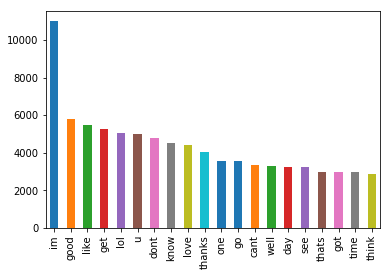

In [14]:
import matplotlib.pyplot as plot
freq.plot(kind="bar")

In [15]:
freq=list(freq.index)
freq

['im',
 'good',
 'like',
 'get',
 'lol',
 'u',
 'dont',
 'know',
 'love',
 'thanks',
 'one',
 'go',
 'cant',
 'well',
 'day',
 'see',
 'thats',
 'got',
 'time',
 'think']

In [16]:
train["SentimentText"]=train["SentimentText"].apply(lambda x: " ".join(x for x in x.split()if x not in freq))
train["SentimentText"].head(10)

0                                       sad apl friend
1                              missed new moon trailer
2                                      omg already 730
3    omgaga sooo gunna cry ive dentist since 11 sup...
4                                   mi bf cheating t_t
5                                           worry much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                       sunny work tomorrow tv tonight
8                    handed uniform today miss already
9                                  hmmmm wonder number
Name: SentimentText, dtype: object

In [17]:
freq=pd.Series(" ".join(train["SentimentText"]).split()).value_counts()[-10:]
freq

yacups                 1
beardandbeers          1
born4gr8tness          1
batjosh                1
alleannab4ever         1
britnielise            1
ppppllleeeaaassseee    1
ryanseacest            1
bookingit              1
christy8_77            1
dtype: int64

In [18]:
train["SentimentText"]=train["SentimentText"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train["SentimentText"].head(10)

0                                       sad apl friend
1                              missed new moon trailer
2                                      omg already 730
3    omgaga sooo gunna cry ive dentist since 11 sup...
4                                   mi bf cheating t_t
5                                           worry much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                       sunny work tomorrow tv tonight
8                    handed uniform today miss already
9                                  hmmmm wonder number
Name: SentimentText, dtype: object

In [19]:
from textblob import TextBlob
train["SentimentText"][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                       sad all friend
1                              missed new moon trailer
2                                      org already 730
3    omaha soon unna cry give dentist since 11 supp...
4                                   mi of cheating tut
Name: SentimentText, dtype: object

In [20]:
TextBlob(train["SentimentText"][3]).words

WordList(['omgaga', 'sooo', 'gunna', 'cry', 'ive', 'dentist', 'since', '11', 'suposed', '2', 'crown', 'put', '30mins'])

In [21]:
from textblob import Word
train["SentimentText"]=train["SentimentText"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train["SentimentText"].head(7)

0                                       sad apl friend
1                              missed new moon trailer
2                                      omg already 730
3    omgaga sooo gunna cry ive dentist since 11 sup...
4                                   mi bf cheating t_t
5                                           worry much
6                     juuuuuuuuuuuuuuuuussssst chillin
Name: SentimentText, dtype: object

In [22]:
TextBlob(train["SentimentText"][1]).ngrams(2)

[WordList(['missed', 'new']),
 WordList(['new', 'moon']),
 WordList(['moon', 'trailer'])]